In [8]:
import pandas as pd
df = pd.read_excel('http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls')
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [67]:
# check any missing values
df.isnull().any()

Price        False
Mileage      False
Make         False
Model        False
Trim         False
Type         False
Cylinder     False
Liter        False
Doors        False
Cruise       False
Sound        False
Leather      False
Model_ord    False
dtype: bool

In [44]:
import warnings
warnings.filterwarnings("ignore") # default

import statsmodels.api as sm

# features should be number for the analysis
df['Model_ord'] = pd.Categorical(df.Model).codes
print(df.info())

# predict price based on the mileage, the model, and number of doors
X = df[['Mileage', 'Model_ord', 'Doors', 'Cruise']]
y = df[['Price']]

X = sm.add_constant(X)
est = sm.OLS(y,X).fit()

# for normalized data (scaled 0 to 1) coefficients are useful
# for non-normalized data, like here, standart errors are useful
est.summary()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 13 columns):
Price        804 non-null float64
Mileage      804 non-null int64
Make         804 non-null object
Model        804 non-null object
Trim         804 non-null object
Type         804 non-null object
Cylinder     804 non-null int64
Liter        804 non-null float64
Doors        804 non-null int64
Cruise       804 non-null int64
Sound        804 non-null int64
Leather      804 non-null int64
Model_ord    804 non-null int8
dtypes: float64(2), int64(6), int8(1), object(4)
memory usage: 76.2+ KB
None


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     57.63
Date:                Wed, 03 Apr 2019   Prob (F-statistic):           9.43e-43
Time:                        11:14:33   Log-Likelihood:                -8434.2
No. Observations:                 804   AIC:                         1.688e+04
Df Residuals:                     799   BIC:                         1.690e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.256e+04   1748.449     12.905      0.000    1.91e+04     2.6e+04
Mileage       -0.1878      0.038     -4.993      0.000      -0.262      -0.114
Model_ord      4.3092     35.552      0.121      0.904     -65.476      74.095
Doors      -1404.7404    363.007     -3.870      0.000   -2117.301    -692.180
Cruise      9827.3975    717.267     13.701      0.000    8419.447    1.12e+04
==============================================================================
Omnibus:                      199.743   Durbin-Watson:                   0.364
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              536.098
Skew:                           1.257   Prob(JB):                    3.87e-117
Kurtosis:                       6.112   Cond. No.                     1.25e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
print('mean', y.groupby(df.Doors).mean())
print('median',y.groupby(df.Doors).median())

mean               Price
Doors              
2      23807.135520
4      20580.670749
median               Price
Doors              
2      17631.383035
4      18073.200605


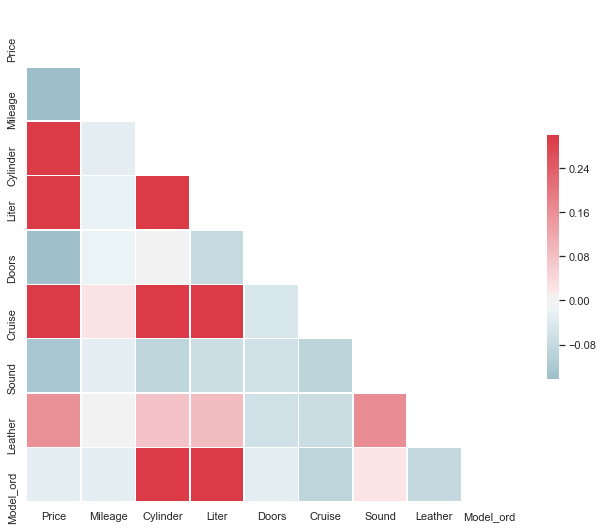

In [62]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})